In [8]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt




In [9]:
df = pd.read_csv('Wprld population growth rate by cities 2024.csv')
df

,City,Country,Continent,Population (2024),Population (2023),Growth Rate
0,Tokyo,Japan,Asia,37115035,37194105,-0.0021
1,Delhi,India,Asia,33807403,32941309,0.0263
2,Shanghai,China,Asia,29867918,29210808,0.0225
3,Dhaka,Bangladesh,Asia,23935652,23209616,0.0313
4,Sao Paulo,Brazil,South America,22806704,22619736,0.0083
...,...,...,...,...,...,...
796,Bhavnagar,India,Asia,751493,737128,0.0195
797,Sheffield,United Kingdom,Europe,751303,745876,0.0073
798,Huambo,Angola,Africa,751297,727641,0.0325
799,Ribeirao Preto,Brazil,South America,750174,742115,0.0109


/var/folders/9n/jvxczw3j3mbgs3rdk9lnk9km0000gn/T/ipykernel_1156/3254484305.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


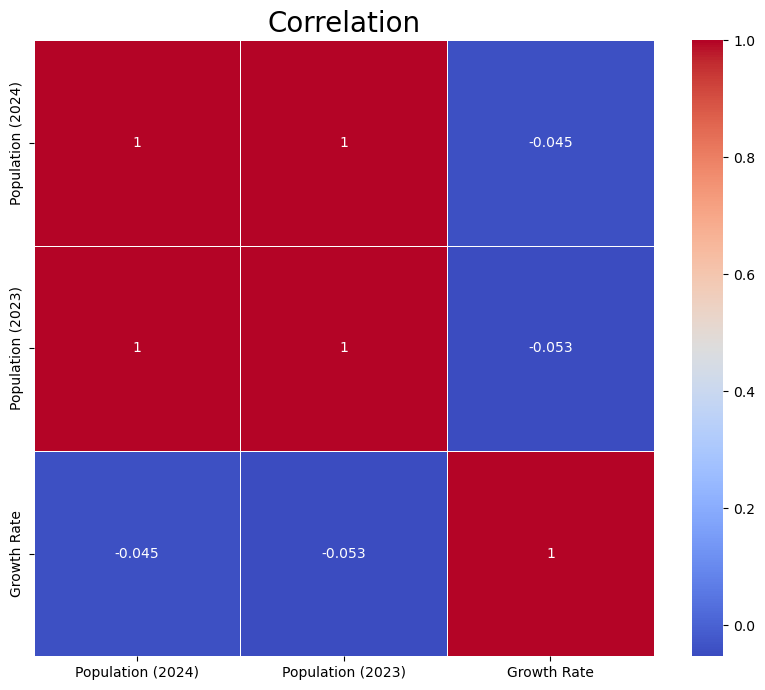

In [10]:
# checking out the correlation rate 
correlation = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Correlation',fontsize=20)

plt.show()

In [18]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


# Creating the target variable (Population 2025)
df['Population_2025'] = df['Population (2024)'] * (1 + df['Growth Rate'])

# Display the first few rows with the predicted population for 2025
features = df[['Population (2024)', 'Growth Rate']]
target = df['Population_2025']



X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

y_pred, mae


(array([  864390.809743  ,   924251.220761  ,  6346507.49863   ,
         1120359.572469  ,  6144511.081463  ,   983079.544364  ,
         1589570.52584   ,  1216160.544284  ,  1080443.095674  ,
         1298420.753985  ,  6240300.43440301,  1877635.853931  ,
          985405.827764  ,  6020571.915192  ,  1707614.166291  ,
         1432173.43655   ,  2191713.333922  ,  1454714.205705  ,
         1004826.852542  ,  1130511.363326  ,   930013.232799  ,
         1128502.43398   ,   981403.043682  ,   842794.394584  ,
         1552280.878849  , 11570031.72848698,  2052832.88557   ,
          954545.485428  ,  1009850.4204    ,  1059323.647107  ,
         2415326.100894  ,  5643843.9478    ,  1027460.195462  ,
         1461843.029402  ,  9817802.994364  , 13769424.645299  ,
          901505.703485  ,  1401406.909012  ,   761609.944506  ,
         1005658.463866  ,  3511376.93948   ,  2159494.703768  ,
         3010882.534223  ,  1697563.971088  ,  1030051.207569  ,
         1145284.12533   